In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns

In [2]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/cancer_classification.csv")

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


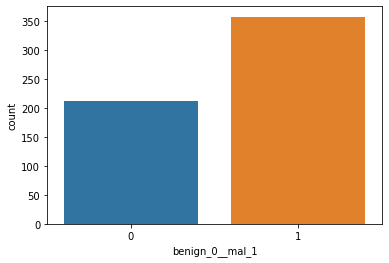

In [6]:
sns.countplot(x="benign_0__mal_1",data=df)

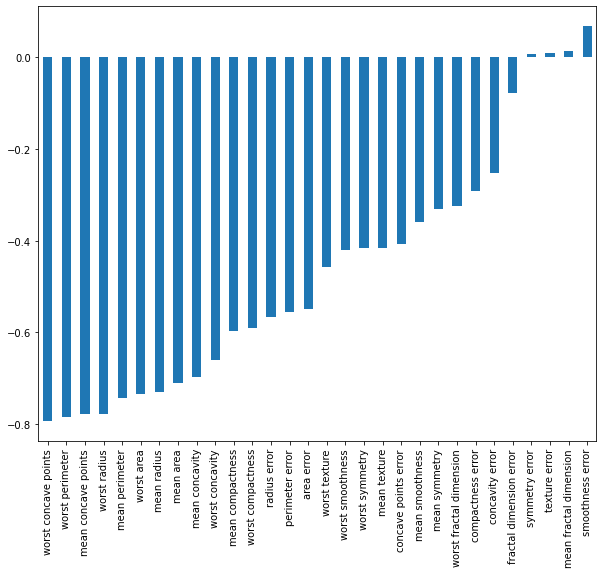

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
df.corr()["benign_0__mal_1"][:-1].sort_values().plot(kind="bar")

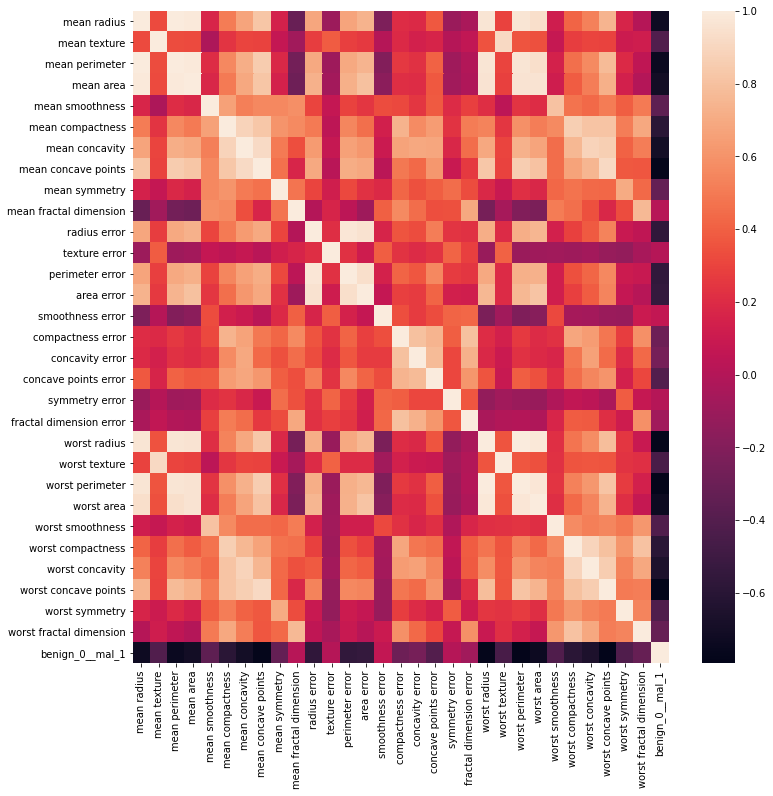

In [15]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

In [16]:
X = df.drop("benign_0__mal_1",axis=1).values
y = df["benign_0__mal_1"].values

In [18]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [21]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [25]:
X_train.shape

(426, 30)

In [36]:
model = Sequential()
model.add(Dense(30,activation="relu",kernel_initializer="he_normal",input_shape=(30,)))
model.add(Dense(30,activation="relu",kernel_initializer="he_normal"))
model.add(Dense(1,activation="sigmoid",kernel_initializer="glorot_normal"))
model.compile(loss="binary_crossentropy",optimizer= "adam",metrics = ["accuracy"])

In [37]:
model_history = model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=32,epochs=100)

Epoch 1/100
14/14 [==============================] - 0s 11ms/step - loss: 0.7038 - accuracy: 0.6315 - val_loss: 0.6758 - val_accuracy: 0.6154
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6487 - accuracy: 0.6526 - val_loss: 0.6237 - val_accuracy: 0.7343
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5949 - accuracy: 0.7793 - val_loss: 0.5610 - val_accuracy: 0.8392
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5312 - accuracy: 0.8239 - val_loss: 0.4907 - val_accuracy: 0.8322
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4643 - accuracy: 0.8545 - val_loss: 0.4224 - val_accuracy: 0.8741
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4081 - accuracy: 0.8615 - val_loss: 0.3720 - val_accuracy: 0.8951
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 0.3663 - accuracy: 0.8709 - val_loss: 0.3293 - val_accuracy: 0.9091
Epoch 8/100


In [38]:
history_df = pd.DataFrame(model_history.history)

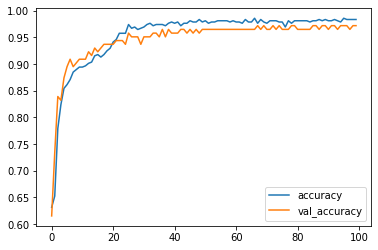

In [39]:
history_df[["accuracy","val_accuracy"]].plot()

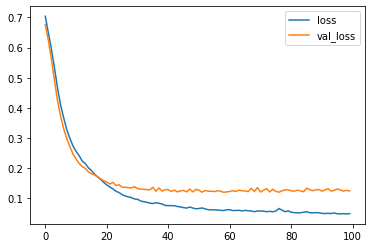

In [40]:
history_df[["loss","val_loss"]].plot()

In [41]:
model = Sequential()
model.add(Dense(30,activation="relu",kernel_initializer="he_normal",input_shape=(30,)))
model.add(Dense(30,activation="relu",kernel_initializer="he_normal"))
model.add(Dense(1,activation="sigmoid",kernel_initializer="glorot_normal"))
model.compile(loss="binary_crossentropy",optimizer= "adam",metrics = ["accuracy"])

In [43]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=25)

In [44]:
model_history = model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=32,epochs=100,callbacks=[early_stop])

Epoch 1/100
14/14 [==============================] - 0s 10ms/step - loss: 0.7156 - accuracy: 0.6268 - val_loss: 0.7017 - val_accuracy: 0.6154
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6816 - accuracy: 0.6291 - val_loss: 0.6647 - val_accuracy: 0.6154
Epoch 3/100
14/14 [==============================] - 0s 4ms/step - loss: 0.6467 - accuracy: 0.6479 - val_loss: 0.6295 - val_accuracy: 0.6783
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6111 - accuracy: 0.7629 - val_loss: 0.5897 - val_accuracy: 0.8042
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5708 - accuracy: 0.8380 - val_loss: 0.5440 - val_accuracy: 0.8881
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5214 - accuracy: 0.8756 - val_loss: 0.4886 - val_accuracy: 0.9091
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4660 - accuracy: 0.8826 - val_loss: 0.4313 - val_accuracy: 0.9580
Epoch 8/100


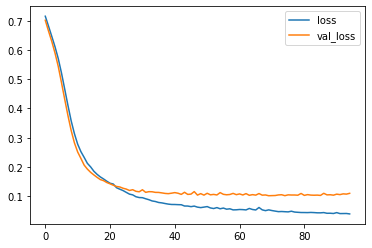

In [45]:
history_df = pd.DataFrame(model_history.history)
history_df[["loss","val_loss"]].plot()

In [46]:
from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(Dense(30,activation="relu",kernel_initializer="he_normal",input_shape=(30,)))
model.add(Dropout(0.3))
model.add(Dense(30,activation="relu",kernel_initializer="he_normal"))
model.add(Dropout(0.3))
model.add(Dense(1,activation="sigmoid",kernel_initializer="glorot_normal"))
model.compile(loss="binary_crossentropy",optimizer= "adam",metrics = ["accuracy"])

In [47]:
early_stop = EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=25)
model_history = model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=32,epochs=400,callbacks=[early_stop])

Epoch 1/400
14/14 [==============================] - 0s 12ms/step - loss: 0.7020 - accuracy: 0.5798 - val_loss: 0.6535 - val_accuracy: 0.6713
Epoch 2/400
14/14 [==============================] - 0s 3ms/step - loss: 0.6361 - accuracy: 0.6761 - val_loss: 0.6235 - val_accuracy: 0.7622
Epoch 3/400
14/14 [==============================] - 0s 3ms/step - loss: 0.6312 - accuracy: 0.7066 - val_loss: 0.5923 - val_accuracy: 0.8252
Epoch 4/400
14/14 [==============================] - 0s 3ms/step - loss: 0.5883 - accuracy: 0.7864 - val_loss: 0.5571 - val_accuracy: 0.9021
Epoch 5/400
14/14 [==============================] - 0s 3ms/step - loss: 0.5618 - accuracy: 0.7793 - val_loss: 0.5175 - val_accuracy: 0.8811
Epoch 6/400
14/14 [==============================] - 0s 3ms/step - loss: 0.5352 - accuracy: 0.8075 - val_loss: 0.4747 - val_accuracy: 0.8881
Epoch 7/400
14/14 [==============================] - 0s 3ms/step - loss: 0.4999 - accuracy: 0.8122 - val_loss: 0.4331 - val_accuracy: 0.8951
Epoch 8/400


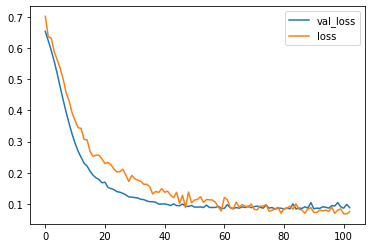

In [48]:
history_df = pd.DataFrame(model_history.history)
history_df[["val_loss","loss"]].plot()

In [50]:
predictions = model.predict_classes(X_test)

In [51]:
from sklearn.metrics import classification_report,confusion_matrix

In [53]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        55
           1       0.99      0.99      0.99        88

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [54]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 1 87]]
